# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [22]:
### импортируйте нужные библиотеки 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from phik import phik_matrix

In [23]:
df = pd.read_csv('./diabetes_prediction_dataset.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Female,Female,Male,Female,Male,Female,Female,Female,Male,Female
age,80.0,54.0,28.0,36.0,76.0,20.0,44.0,79.0,42.0,32.0
hypertension,0,0,0,0,1,0,0,0,0,0
heart_disease,1,0,0,0,1,0,0,0,0,0
smoking_history,never,No Info,never,current,current,never,never,No Info,never,never
bmi,25.19,27.32,27.32,23.45,20.14,27.32,19.31,23.86,33.64,27.32
HbA1c_level,6.6,6.6,5.7,5.0,4.8,6.6,6.5,5.7,4.8,5.0
blood_glucose_level,140,80,158,155,155,85,200,85,145,100
diabetes,0,0,0,0,0,0,1,0,0,0


In [24]:
# ваш код здесь
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [25]:
display(df['smoking_history'].value_counts())
display(df['gender'].value_counts())

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


**Вывод:**

- Средний возраст людей в наборе данных составляет примерно 41,89 лет.
- Возраст колеблется от 0,08 до 80 лет, со стандартным отклонением 22,52.
- Распространенность гипертонии в наборе данных низкая, лишь у 7,49% людей есть гипертония.
- Небольшой процент (3,94%) людей в наборе данных имеют заболевание сердца.
- Средний показатель BMI составляет 27,32, со стандартным отклонением 6,64.
- BMI колеблется от 10,01 до 95,69.
- Средний уровень HbA1c составляет 5,53, со стандартным отклонением 1,07.
- Уровень HbA1c варьируется от 3,5 до 9,0.
- Средний уровень глюкозы в крови составляет 138,06, со стандартным отклонением 40,71.
- Уровень глюкозы в крови колеблется от 80,00 до 300,00.
- Распространенность диабета в наборе данных низкая, всего у 8,5% людей есть диабет.

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [27]:
# ваш код здесь
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99994    False
99996    False
99997    False
99998    False
99999    False
Length: 96146, dtype: bool

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [30]:
# ваш код здесь
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [31]:
# ваш код здесь
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


**Вывод:** менять ничего не хочу

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

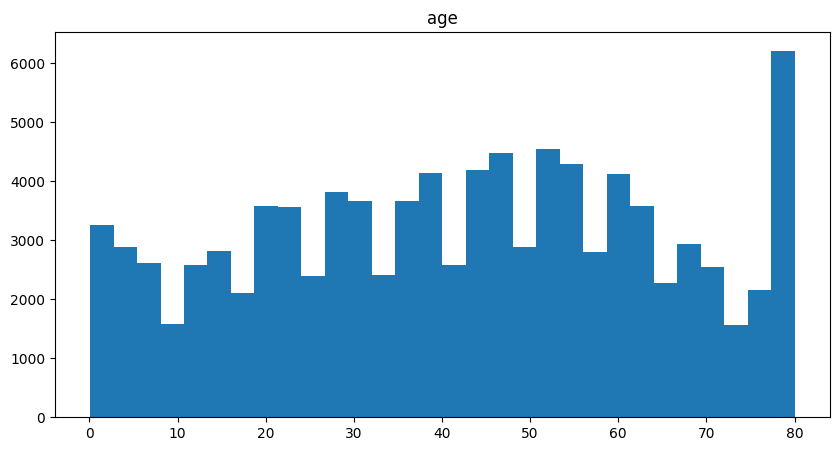

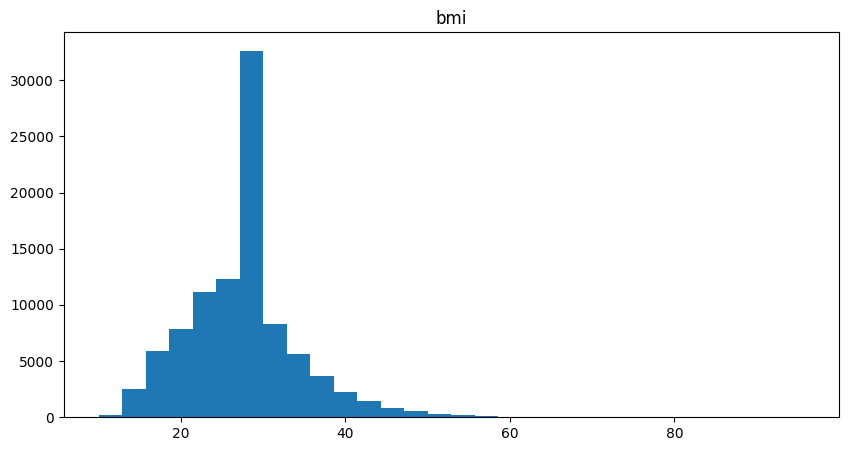

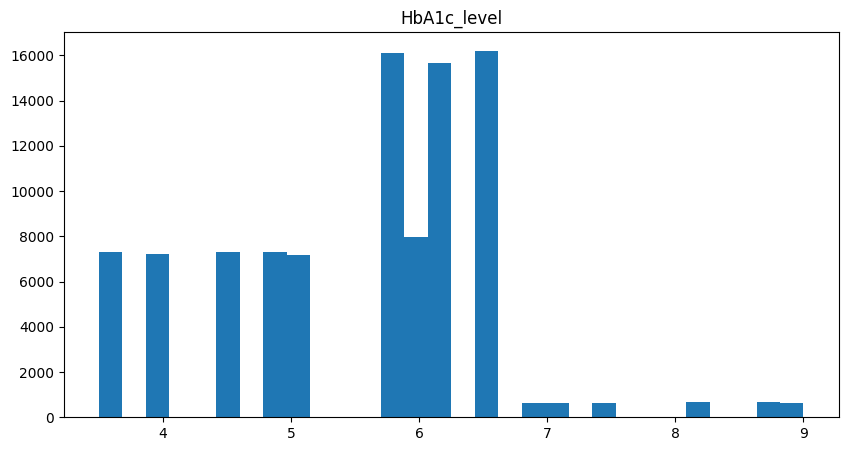

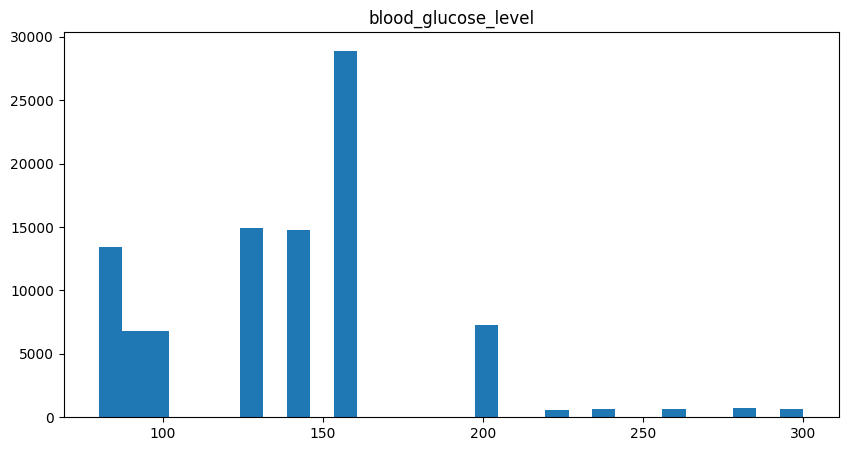

In [32]:
# ваш код здесь
df_num = df.loc[:, ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
for col in df_num:
    plt.figure(figsize=(10,5))
    plt.title(col)
    plt.hist(df[col], bins=30)
    plt.show()

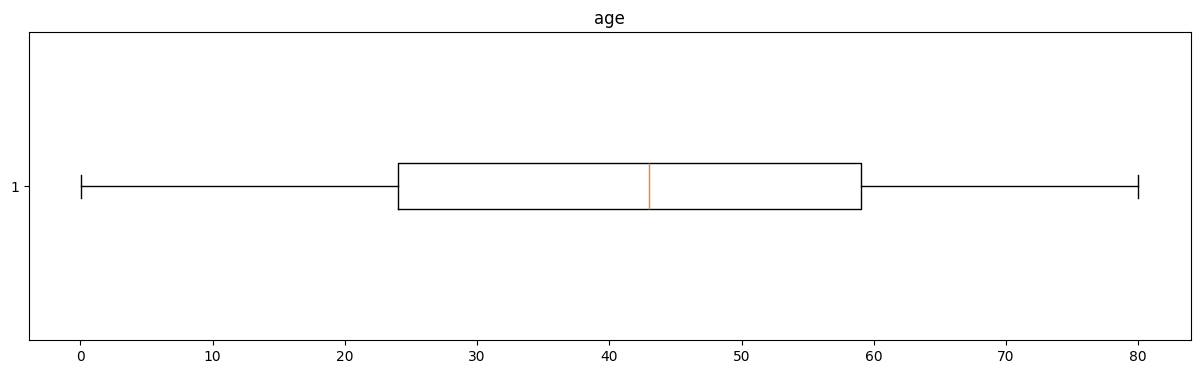

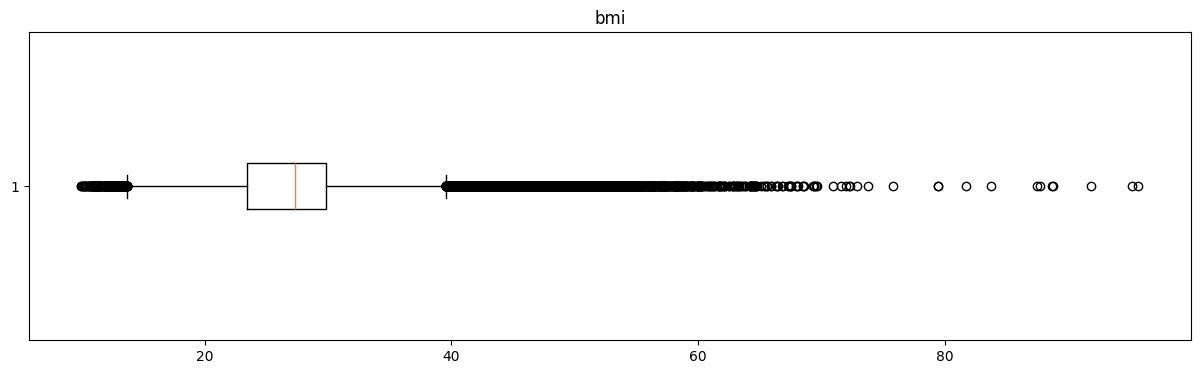

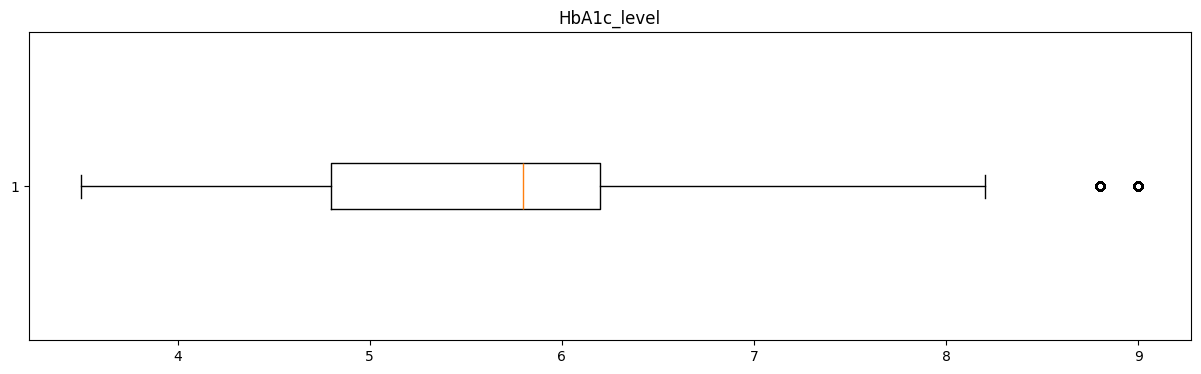

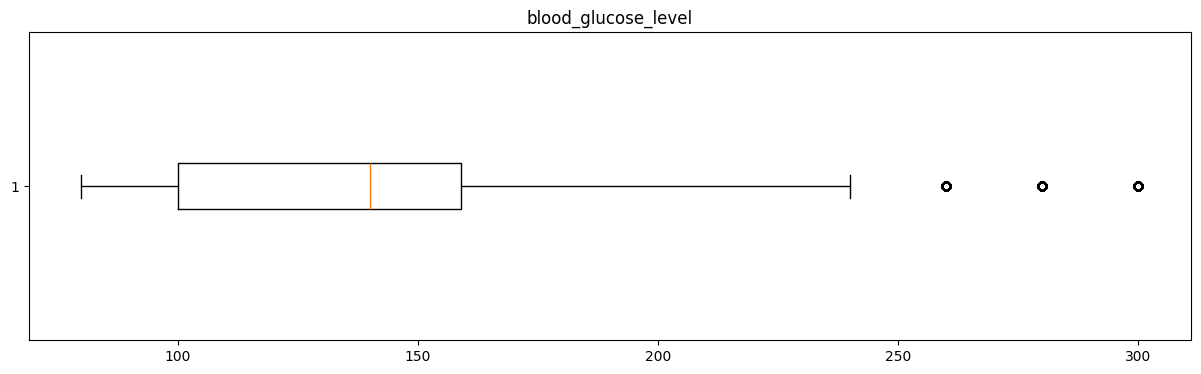

In [33]:
for col in df_num:    
    plt.figure(figsize=(15,4))
    plt.title(col)
    plt.boxplot(df[col], vert=False)
    plt.show()

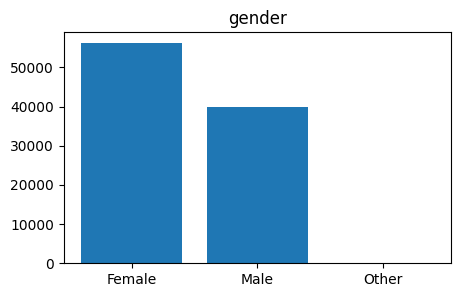

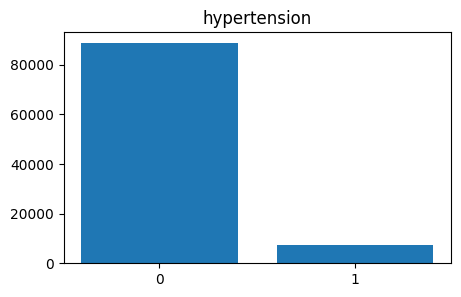

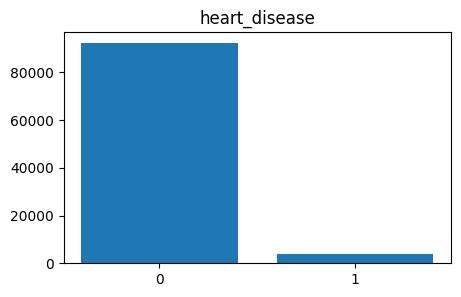

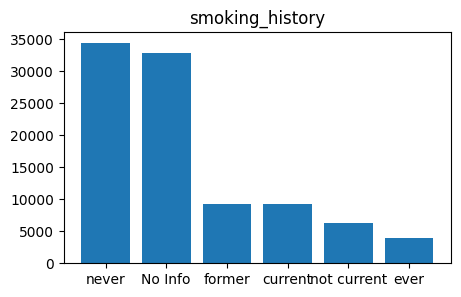

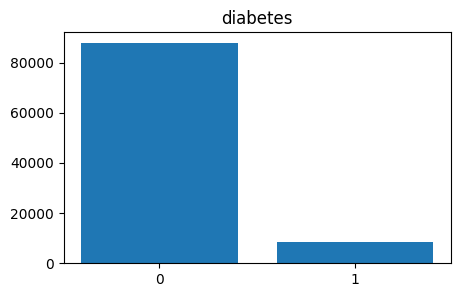

In [34]:
df_cat = df.loc[:, ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']]

for cat in df_cat:
    tmp = df[cat].value_counts()
    plt.figure(figsize=(5,3))
    plt.title(cat)
    plt.bar(tmp.index, height=tmp.values)
    plt.xticks(tmp.index)
    plt.show()

In [35]:
df['gender_code'] = pd.factorize(df['gender'])[0]
df['smoking_history_code'] = pd.factorize(df['smoking_history'])[0]

<Axes: >

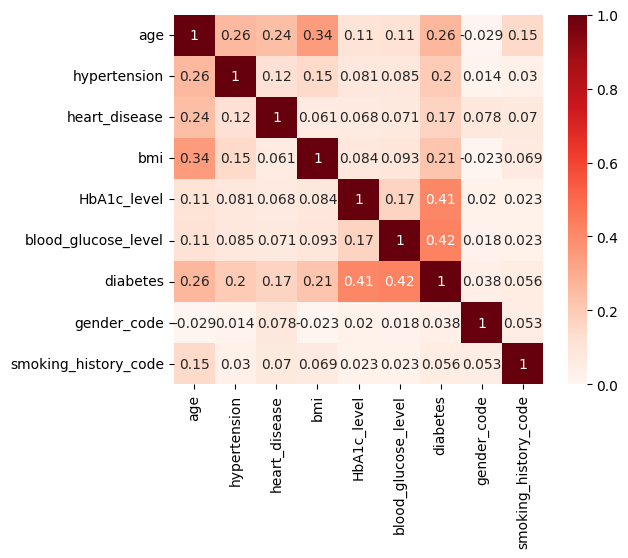

In [36]:
df_corr = df.loc[:, ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_code', 'smoking_history_code']]
corrs = df_corr.corr()
sns.heatmap(corrs,
            cmap='Reds',
            square=True,
            vmin=0, 
            annot=True)

**Вывод:**

- Распределение по возрасту участников исследования в основном однородно, хотя стоит отметить, что среди них больше 80-летних.
- Индекс массы тела (ИМТ) имеет нормальное распределение, но можно наблюдать тенденцию к избыточному весу.
- Уровни гемоглобина и глюкозы в крови в основном нормальные, хотя есть несколько высоких значений.
- Наибольшую корреляцию с целевой переменной показывают показатели глюкозы (0,6) и гемоглобина (0,32).
- Глюкоза имеет выраженную кореляцию с полом (0,42), заболеваниями сердца (0,26) и гипертонией (0,23). Поэтому можно предположить, что они оказывают косвенное вляние на развитие диабета.
- Также с возрастом увеличивается риск гипертонии (0,42), заболеваниий сердца (0,67). Курение имеет корреляцию с гипертонией и заболеваниями сердца 0,59 и 0,27 соответственно.
- Показатель ИМТ (-0,53) имеет выраженную отрицательную корреляцию с диабетом, что может указывать на то, что более низкий ИМТ связан с меньшим риском развития диабета.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

In [37]:
df_diabet = df.loc[df['diabetes'] == 1]
df_diabet.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_code,smoking_history_code
6,Female,44.0,0,0,never,19.31,6.5,200,1,0,0
26,Male,67.0,0,1,not current,27.32,6.5,200,1,1,5
38,Male,50.0,1,0,current,27.32,5.7,260,1,1,2
40,Male,73.0,0,0,former,25.91,9.0,160,1,1,3
53,Female,53.0,0,0,former,27.32,7.0,159,1,0,3


In [38]:
df_no_diabet = df.loc[df['diabetes'] == 0]
df_no_diabet.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_code,smoking_history_code
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,1
2,Male,28.0,0,0,never,27.32,5.7,158,0,1,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,2
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,2


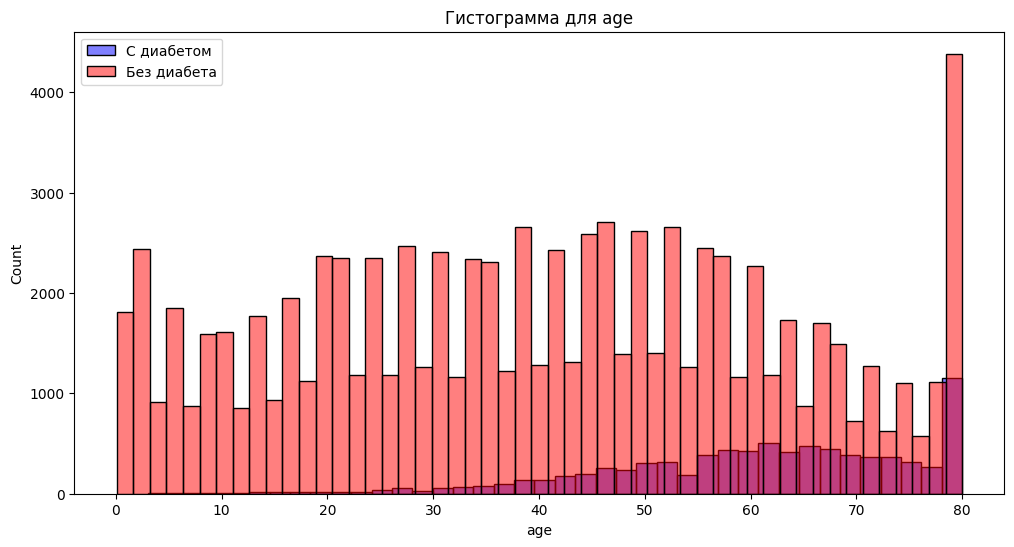

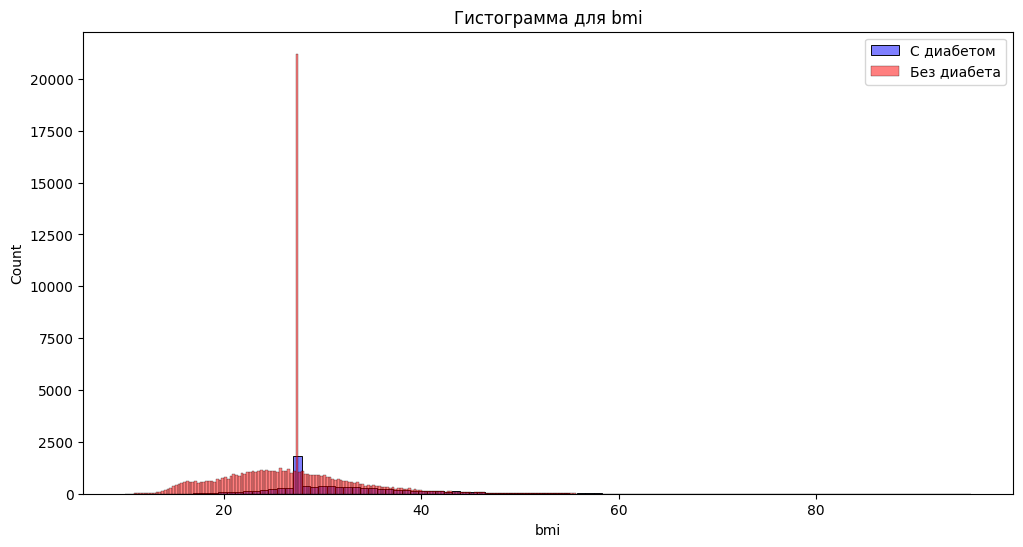

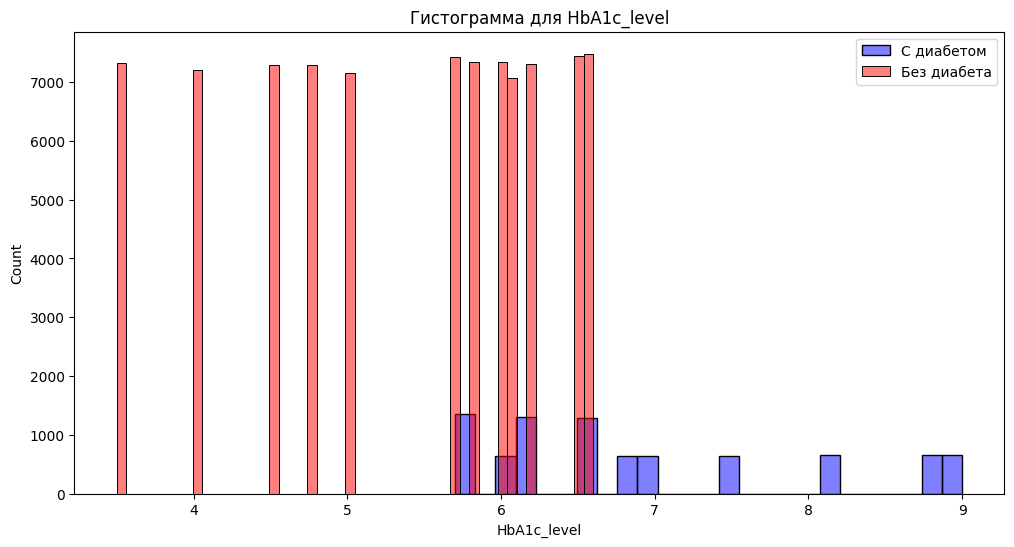

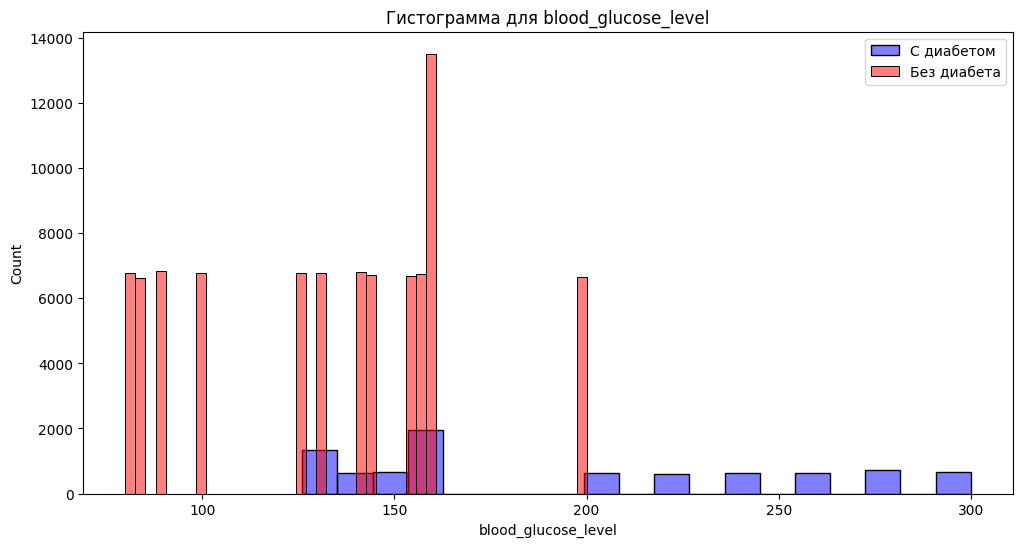

In [39]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for feature in numerical_features:
    df.diabetes
    plt.figure(figsize=(12, 6))
    sns.histplot(df_diabet[feature], color='blue', alpha=0.5, label='С диабетом')
    sns.histplot(df_no_diabet[feature], color='red', alpha=0.5, label='Без диабета')
    plt.title(f'Гистограмма для {feature}')
    plt.legend()
    plt.show()





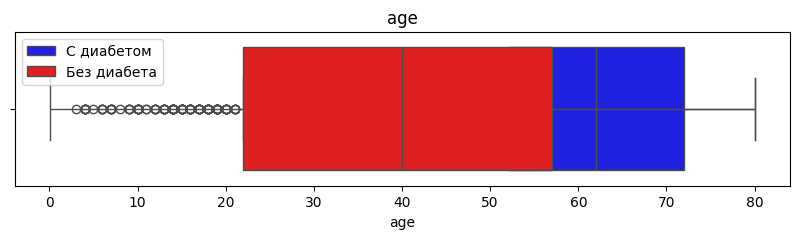

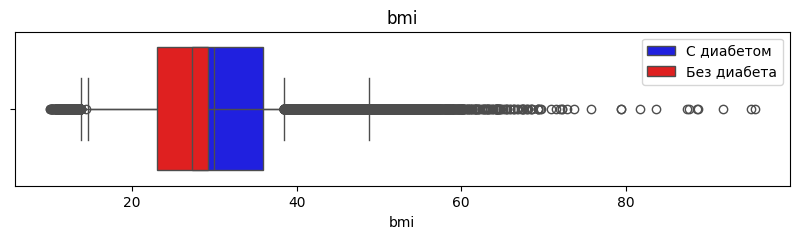

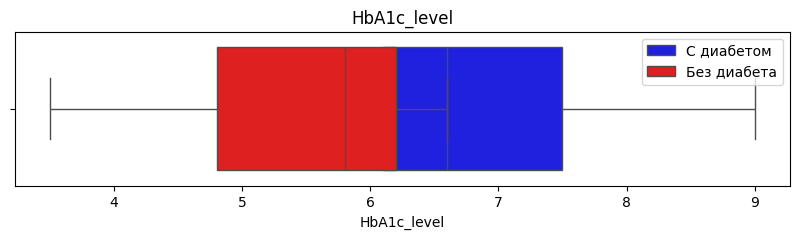

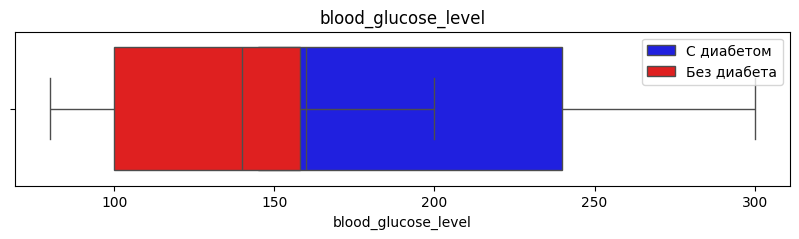

In [40]:

for feature in numerical_features:
    plt.figure(figsize=(10,2))
    plt.title(feature)
    sns.boxplot(df_diabet[feature], color='b', label='С диабетом', orient='h')
    sns.boxplot(df_no_diabet[feature], color='r', label='Без диабета', orient='h')
    plt.legend()
    plt.show()



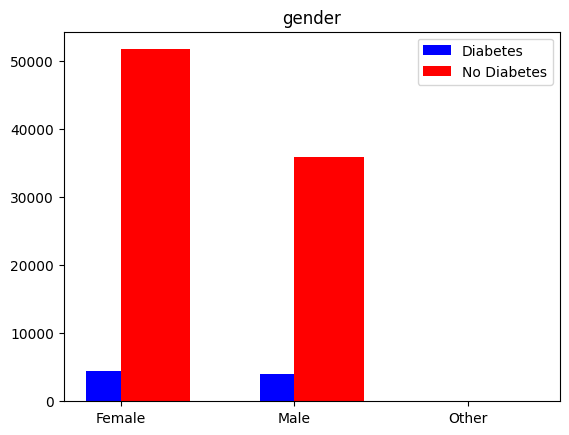

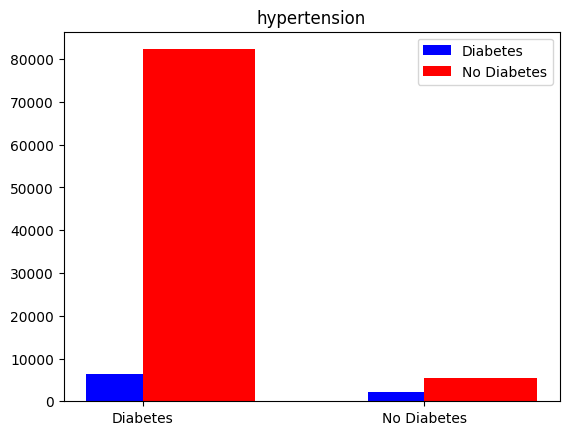

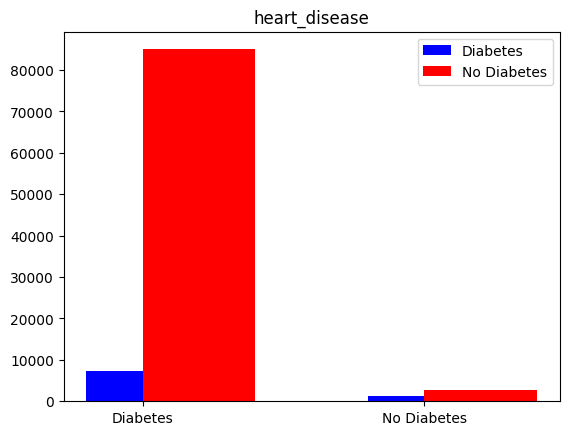

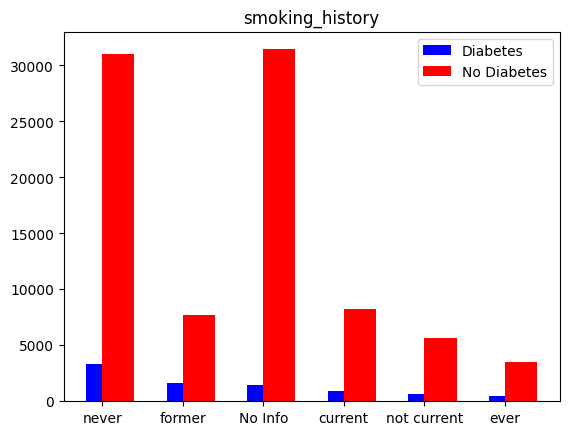

In [41]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for col in cat_cols:
    # Выберите данные по диабету и не диабету
    tmp_diabet = df_diabet[col].value_counts().rename(index={0: 'Diabetes', 1: 'No Diabetes'})
    tmp_no_diabet = df_no_diabet[col].value_counts().rename(index={0: 'Diabetes', 1: 'No Diabetes'})

    # Создание столбчатой диаграммы для диабета
    plt.bar(tmp_diabet.index, tmp_diabet.values, color='b', width=0.4, label='Diabetes', align='center')
    
    # Добавление данных для No Diabetes
    plt.bar(tmp_no_diabet.index, tmp_no_diabet.values, color='r', width=0.4, label='No Diabetes', align='edge')

    # Заголовок и легенда
    plt.title(col)
    plt.legend()
    
    # Показ графика
    plt.show()

**Вывод:**

Сравнение двух выборок подтверждает результаты анализа всей выборки.

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_code', 'smoking_history_code']


<Axes: >

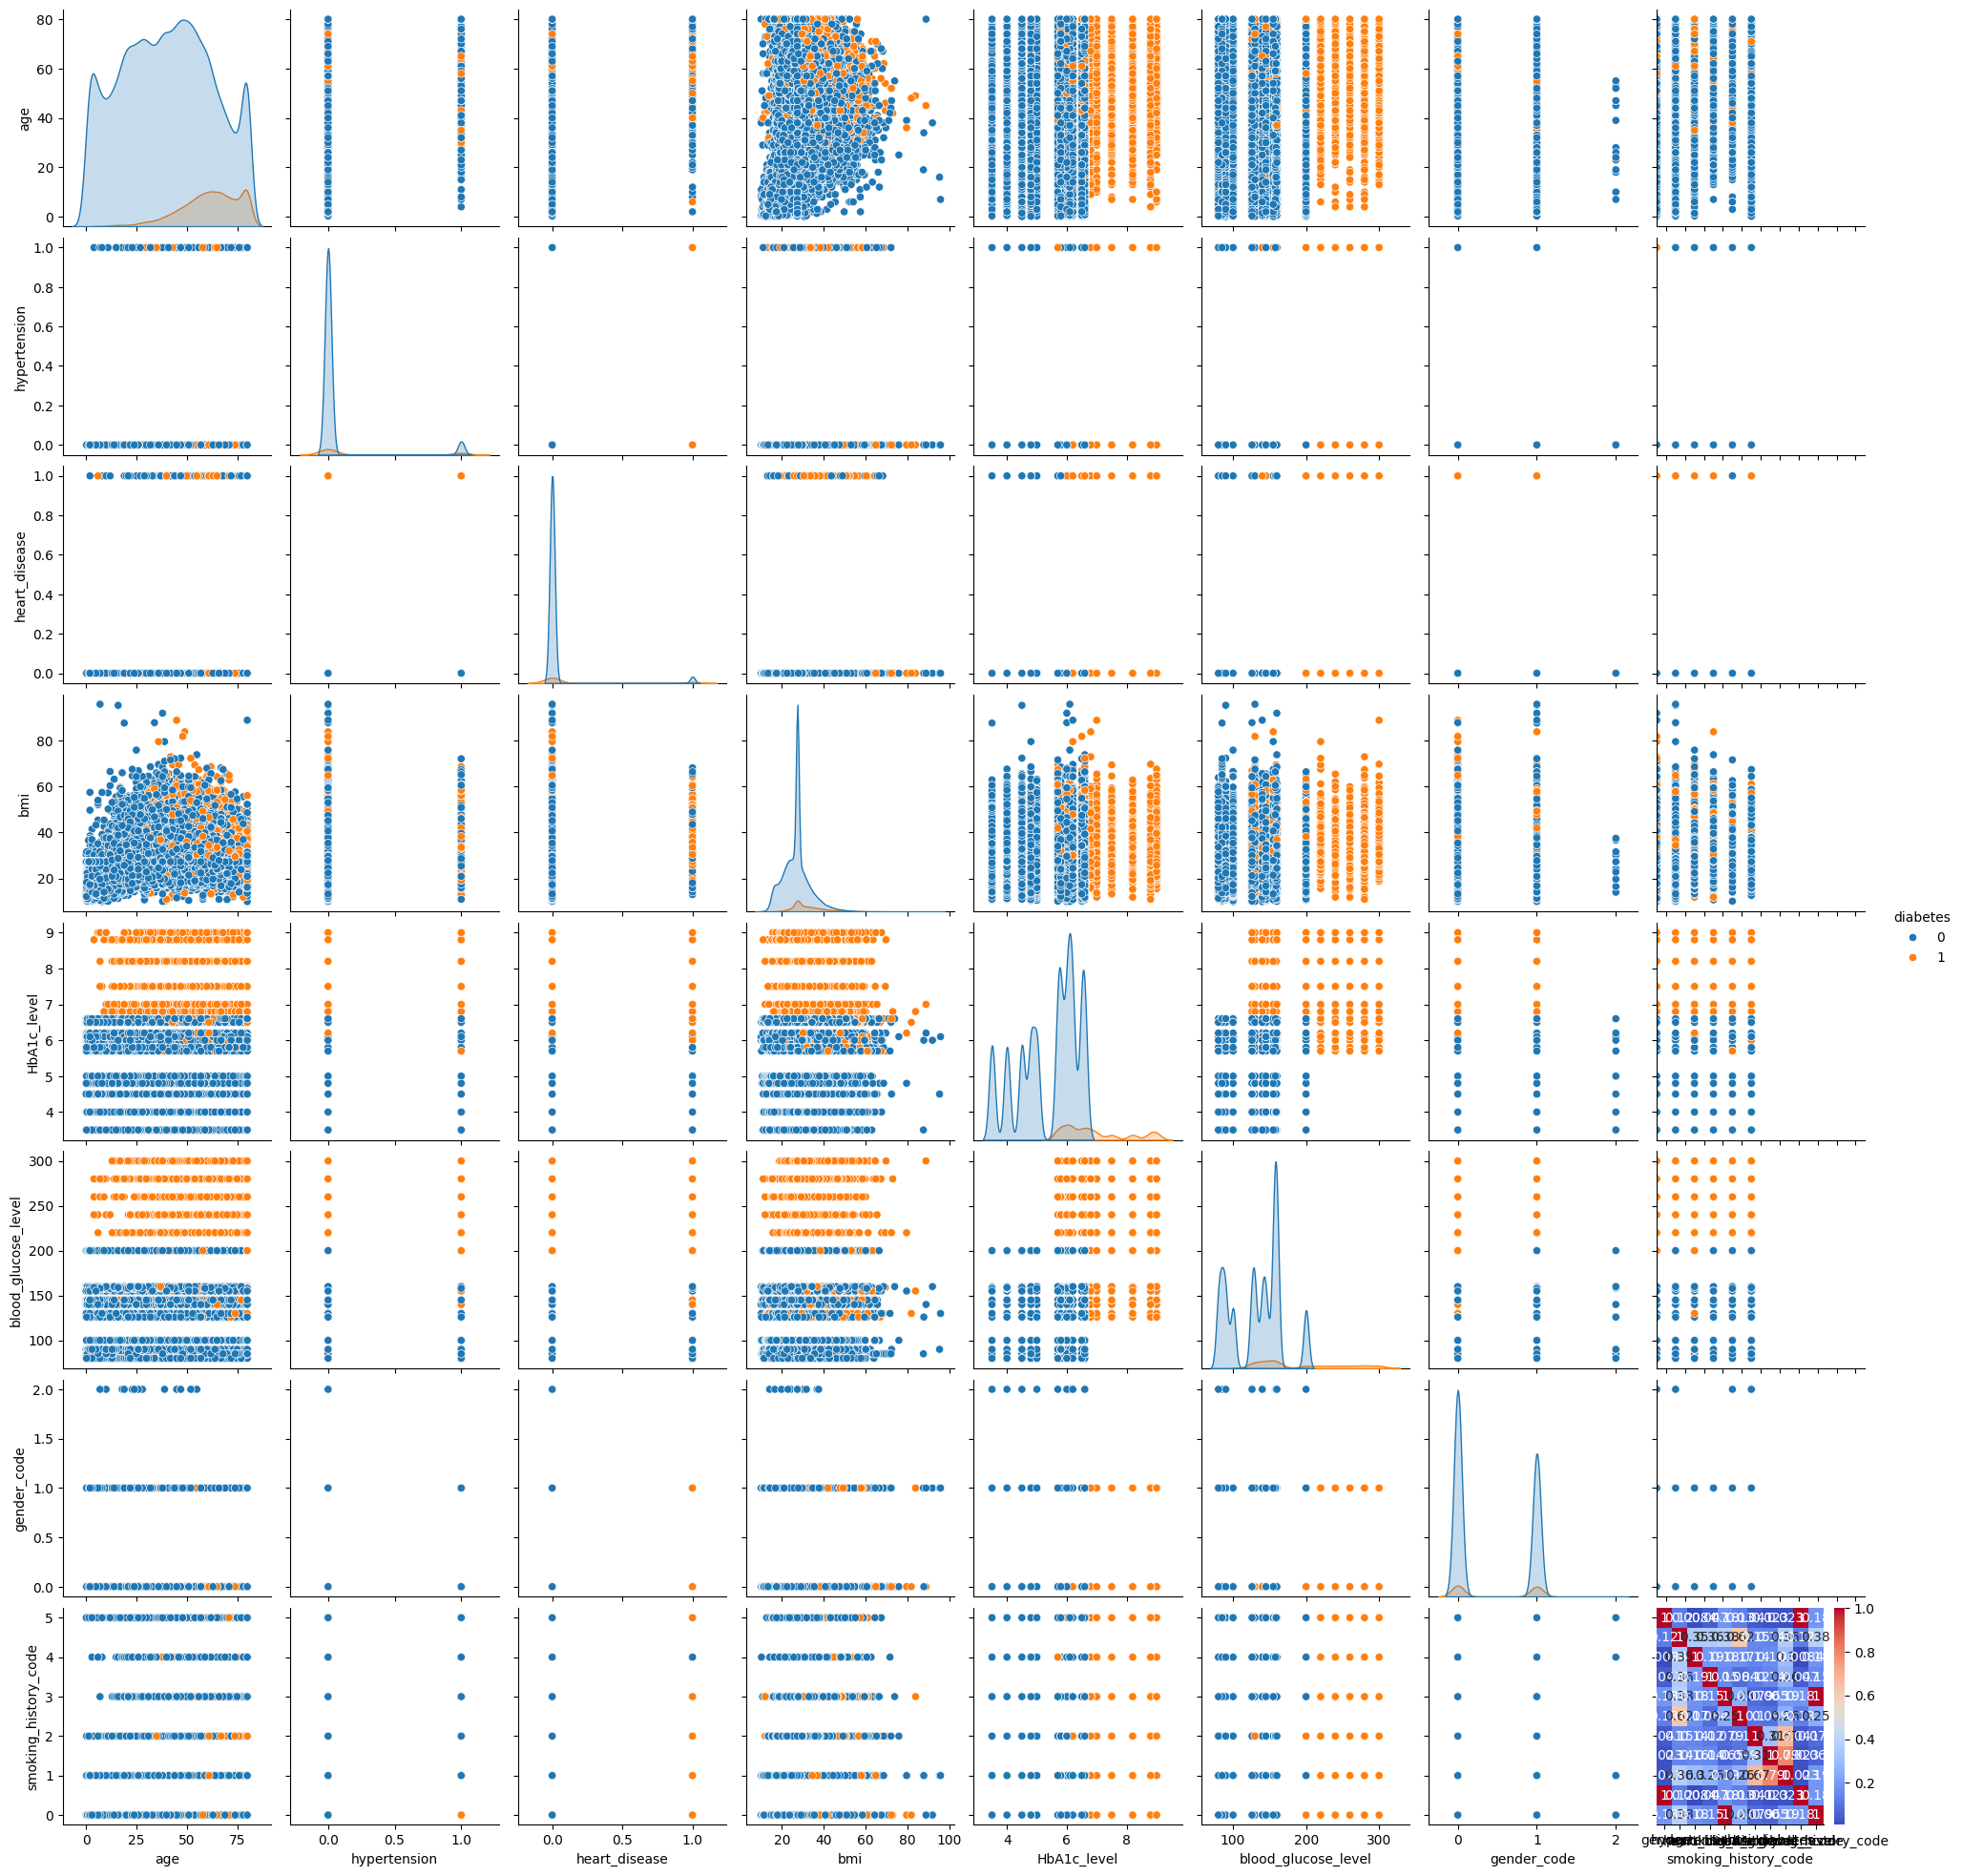

In [44]:

diabetes_patients = df[df['diabetes'] == 1]
non_diabetes_patients = df[df['diabetes'] == 0]

# Парный график с оттенком="диабет"
sns.pairplot(df, hue='diabetes')

# Вычисляем корреляционную матрицу Phik
phik_matrix = df.phik_matrix()

# Тепловая карта корреляционной матрицы Phik
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')


# Общий вывод  
- Парный график с отображением оттенка "диабет" позволяет наглядно рассмотреть взаимосвязи между различными признаками в зависимости от наличия диабета. Это помогает идентифицировать возможные закономерности и различия между пациентами с диабетом и без него.

- Тепловая карта корреляционной матрицы Phik показывает степень связи между различными переменными в данных, учитывая их категориальную природу. Аннотации на карте обозначают степень корреляции между переменными. Это позволяет выявить значимые связи между признаками и дополнительно подтвердить результаты анализа.

Исходя из этих данных, мы можем точнее оценить взаимосвязи между признаками и диабетом, идентифицировать ключевые факторы, оказывающие влияние на наличие диабета и провести более глубокий анализ данных для выявления дополнительных факторов риска и предикторов заболевания.


Опишите данные и результат исследования, основываясь на предыдущих шагах: